<h1 style="text-align: center;">Frequency Response</h1>
<p style="text-align: center;">Lab 10</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Become familiar with frequency response tools and Bode plots using Python.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Bode plot for **Part 1, Task 1**.  
[ ] Bode plot for **Part 1, Task 2**.  
[ ] Bode plot for **Part 1, Task 3**.  
##### Part 2  
[ ] Time-domain plot for **Part 2, Task 1**.  
[ ] Code for **Part 2, Task 2**.  
[ ] Code for **Part 2, Task 3**. 
[ ] Time-domain plot for **Part 2, Task 4**.

### 3. Part 1
##### 3.0.1 Example Code
The following code shows how to use the **control.TransferFunction()** and **control.bode()** methods. Consult the documentation for further usage if necessary. 

In [253]:
# """ This code is non-functioning, it serves to show syntax for the control.TransferFunction() and control.bode() functions. """

# import control as con #This package is not included in Anaconda and should have been installed in lab 0

# sys = con.TransferFunction(num, den) #S-domain numerator and denominator similar to scipy.signal functions we have used before
# _ = con.bode(sys, omega, dB=True, Hz=True, deg=True, Plot=True) #Use _ to suppress the output, this will still plot because of the Plot=True parameter

##### 3.1 Purpose  
Develop a frequency response from the RLC circuit from **Prelab 10** and present the model using Bode plots.  

##### 3.2 Tasks  
Consider the RLC circuit from **Prelab 10**, which has the values R = 1 k$\Omega$, L = 27 mH, C = 100 nF and has the transfer function, $$H(s) = \frac{\frac{1}{RC}s}{s^2 + \frac{1}{RC}s + \frac{1}{LC}}.$$  
1. Use the expressions found in the prelab to plot the magnitude (in dB) and the phase (in degrees) in Python for the RLC transfer function $H(s)$ from $10^3 \ \frac{rad}{s} \le \omega \le 10^6 \ \frac{rad}{s}$ using an adequately small step size. Use **matplotlib.pyplot.semilogx()** instead of **matplotlib.pyplot.plot()** to plot the x-axis on a logarithmic scale. *Note: You may need to adjust part of the phase by $\pi$ radians to match your results in this task.*

In [255]:
#Insert all necessary imports here

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import control as con


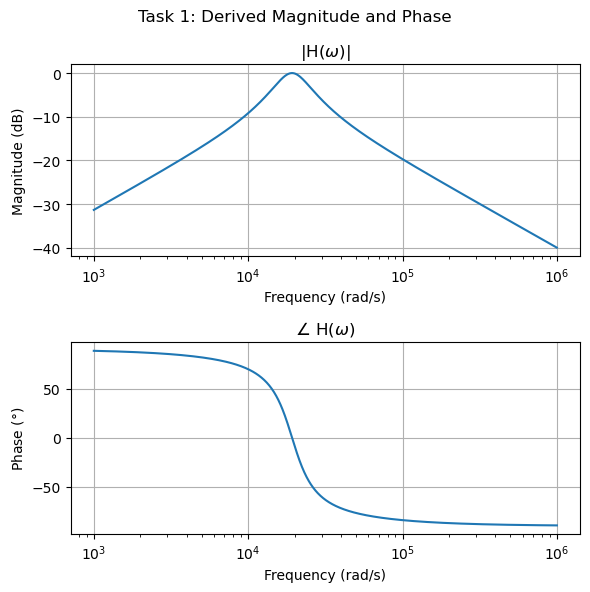

In [256]:
#Insert code for Part 1 Task 1 here

R = 1000 # ohms
L =  27e-3 #mH
C =  100e-9 #nF

step = 1e2
omega = np.arange(1e3, 1e6 + step, step)

Hmag =  (omega / (R * C)) / np.sqrt((-1*omega**2 + 1 / (L * C))**2+(omega / (R * C))**2)
# convert to dB
Hmag_dB = 20 * np.log10(Hmag)

Hphase = np.arctan((R * C * (-1*omega**2 + 1 / (L * C))) / omega)
# convert to deg
Hphase_deg =  np.degrees(Hphase)

plt.figure(figsize=(6, 6))
plt.suptitle('Task 1: Derived Magnitude and Phase')

plt.subplot(2, 1, 1)
plt.semilogx(omega, Hmag_dB)
plt.grid(True)
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.title(r'|H($\omega$)|')

plt.subplot(2, 1, 2)
plt.semilogx(omega, Hphase_deg)
plt.grid(True)
plt.xlabel('Frequency (rad/s)')
plt.ylabel(r'Phase ($\degree$)')
plt.title(r'$\angle$ H($\omega$)')

plt.tight_layout()
plt.show()


2. Use **scipy.signal.bode()** to plot the magnitude and phase frequency response for the RLC transfer function. Check that the plots generated using your hand-derived magnitude and phase match the Bode plot. 

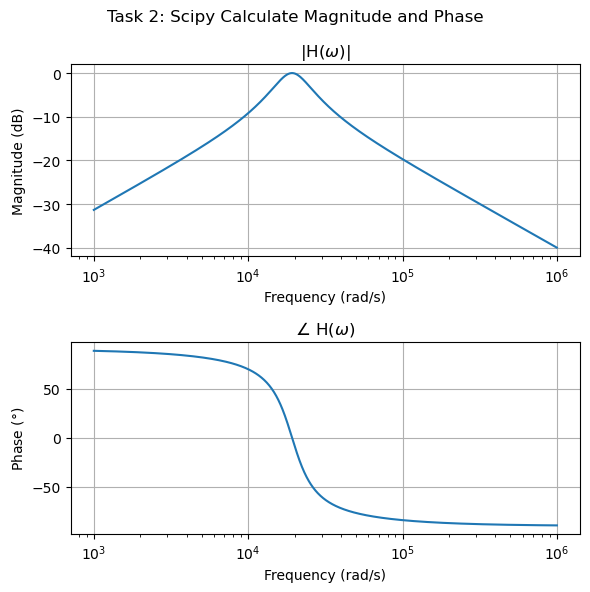

In [258]:
#Insert code for Part 1 Task 2 here

R = 1000 # ohms
L =  27e-3 #mH
C =  100e-9 #nF

step = 1e2
omega = np.arange(1e3, 1e6 + step, step)

num = [1 / (R * C), 0]
den = [1, 1 / (R * C), 1 / (L * C)]

w, Hmag_dB_bode, Hphase_deg_bode = sig.bode((num, den), omega)

plt.figure(figsize=(6, 6))
plt.suptitle('Task 2: Scipy Calculate Magnitude and Phase')

plt.subplot(2, 1, 1)
plt.semilogx(w, Hmag_dB_bode)
plt.grid(True)
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.title(r'|H($\omega$)|')

plt.subplot(2, 1, 2)
plt.semilogx(omega, Hphase_deg_bode)
plt.grid(True)
plt.xlabel('Frequency (rad/s)')
plt.ylabel(r'Phase ($\degree$)')
plt.title(r'$\angle$ H($\omega$)')

plt.tight_layout()
plt.show()

3. In most engineering situations, it may be desirable to find the frequency response with respect to Hz, not rad/s. We may also want to set the specific range of frequencies over which to plot the frequency. Print the transfer function after using **control.TransferFunction()**. Plot the frequency response of the system in Hz using **control.bode()** and following the example code given earlier in the lab. 

<TransferFunction>: sys[18]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         1e+04 s
-------------------------
s^2 + 1e+04 s + 3.704e+08



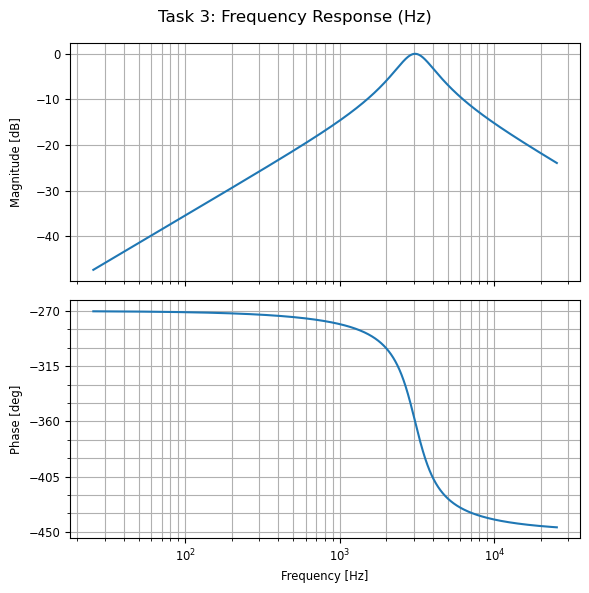

In [260]:
#Insert code for Part 1 Task 3 here

R = 1000 # ohms
L =  27e-3 #mH
C =  100e-9 #nF

num = [1 / (R * C), 0]
den = [1, 1 / (R * C), 1 / (L * C)]

sys = con.TransferFunction(num, den)

print(sys)

# convert to Hz
conv = 2 * np.pi
step_Hz = 1e2 / conv
freq_min_Hz = 1e3 / conv
freq_max_Hz = 1e6 / conv

omega_Hz = np.arange(freq_min_Hz, freq_max_Hz + step_Hz, step_Hz)

plt.figure(figsize=(6, 6))
_ = con.bode(sys, omega_Hz, dB=True, Hz=True, deg=True, plot=True) 

plt.suptitle('Task 3: Frequency Response (Hz)')

plt.tight_layout()
plt.show()

### 4. Part 2  
##### 4.1 Purpose
Use the frequency response model developed in **Part 1** as a filter for a multi-band input signal.

##### 4.2 Tasks  
1. Plot the signal, $$x(t) = \cos(2\pi\cdot100t) + \cos(2\pi\cdot3024t) + \sin(2\pi\cdot50000t)$$ from $0 \le t \le 0.01$ s, setting the sampling frequency high enough to capture all three frequencies and the step size of $\frac{1}{f_s}$.

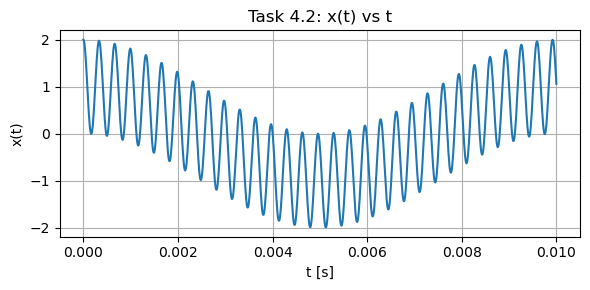

In [262]:
#Insert code for Part 2 Task 1 here

fs = 2 * 50000
step = 1/fs

t = np.arange(0, 0.01 + step, step)

x = np.cos( 2 * np.pi * 100 * t) + np.cos(2 * np.pi * 3024 * t) + np.sin( 2 * np.pi * 50000 * t)

plt.figure(figsize=(6, 3))
plt.title("Task 4.2: x(t) vs t")
plt.plot(t, x)
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

2. To pass the input signal $x(t)$ through the RLC circuit, the transfer function must be converter into its z-domain equivalent. This can be done automatically by Python using **scipy.signal.bilinear()**. *Note: You will be responsible for looking up the documentation on how to use this function.*

In [264]:
#Insert code for Part 2 Task 2 here

R = 1000 # ohms
L =  27e-3 #mH
C =  100e-9 #nF

num = [1 / (R * C), 0]
den = [1, 1 / (R * C), 1 / (L * C)]

num_z, den_z = sig.bilinear(num, den, fs)

3. Use **scipy.signal.lfilter()** to pass the input signal through the filter. Since your output will be a large array, there is no need to print the output.

In [266]:
#Insert code for Part 2 Task 3 here

y = sig.lfilter(num_z, den_z, x)


4. Plot the output signal $y(t)$ over the same time period as **Part 2 Task 1**.

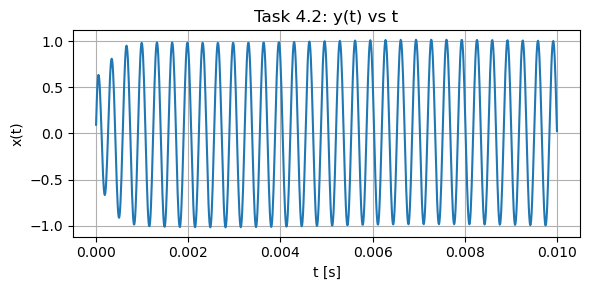

In [268]:
#Insert code for Part 2 Task 4 here

plt.figure(figsize=(6, 3))
plt.title("Task 4.2: y(t) vs t")
plt.plot(t, y)
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()


### 5. Questions
1. Explain how the filter and filtered output in **Part 2** makes sense given the Bode plots from **Part 1**. Discuss how the filter modifies specific frequency bands, in Hz. 
>If we use the resonant frequency equation $f_r = \dfrac{1}{2 \pi \sqrt{L C}}$ with the 27mH and 100nF values, we find that $f_r = 3063Hz$. Examining the Hz Bode plot, we see the peak occurs at roughly the same value as the calculated $f_r$. As our transfer function is that of a bandpass filter, the appearance of this bode plot and the filter's effects on the signal make sense. Frequencies near 3063HZ will pass through the filter without significant adjustment, where as the low and high frequencies outside this narrow range will be significantly attentuated, removing them from the output.
2. Discuss the purpose and workings of **bilinear()** and **lfilter()**. 
>The **scipy.signal.lfilter()** function applies a digital filter (inputs **b** and **a**) to a set of discrete data (input **x**). While the data we generate for x(t) is a discrete set of points, our transfer function describes an analog filter that processes continous signals. To apply the filter, we must first convert its transfer function to a form representing the filter's digital equivalent. This is done using **scipy.signal.bilinear()** which takes our analog filter (inputs **b** and **a**), and, using the sampling frequency (input **fs**), maps its behavior in the s domain onto the z domain. The resulting output is a digital filter approximation suitable for the **lfilter()** function.
3. What happens if you use a different sampling frequency in **scipy.signal.bilinear()** than you used for the time-domain signal?
> If different sampling frequencies are used, the z domain mapping performed by **bilinear()** will be misaligned with x(t) as the frequency ranges will not be 1:1 with eachother. This will cause the frequency range isolated by **lfilter()** to be either overly broad or too narrow compared to the original, effectively stretching and distorting the effects of the filter.
4. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>Replace this text with your answer, but leave the ">" symbol.